In [97]:
import json
import os

results_dir = "results/"
json_files = [pos_json for pos_json in os.listdir(results_dir) if pos_json.endswith('.json')]

data = []
for index, json_fn in enumerate(json_files):
    with open(os.path.join(results_dir, json_fn)) as in_file:
        fusion_group = json_fn.removesuffix('.json')
        content = json.load(in_file)
        data.extend(content)

In [98]:
# This is a single invocation
# data[0]

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.DataFrame.from_dict(data)

# Get the smallest Start timestamp and remove it from every timestamp value
min_start_timestamp = df["startTimestamp"].min()
df["startTimestamp"] = df["startTimestamp"] - min_start_timestamp
df["endTimestamp"] = df["endTimestamp"] - min_start_timestamp

df.head()

,traceId,fusionGroup,source,currentFunction,billedDuration,maxMemoryUsed,isRootInvocation,startTimestamp,endTimestamp,internalDuration,calls
0,39662a6b5edd7602,"ActionSignage,ActionTrafficReroute,AirQualityA...",AnalyzeSensor,AirQualityAlarm,733,77,False,27814,28534,662,"[{'called': 'AirQualityAlarm', 'caller': 'AirQ..."
1,e602b2125d2acaed,"ActionSignage,ActionTrafficReroute,AirQualityA...",AnalyzeSensor,AirQualityAlarm,676,78,False,28389,29064,655,"[{'called': 'AirQualityAlarm', 'caller': 'AirQ..."
2,290bcc9efd33baed,"ActionSignage,ActionTrafficReroute,AirQualityA...",AnalyzeSensor,AirQualityAlarm,100,79,False,29225,29324,98,"[{'called': 'AirQualityAlarm', 'caller': 'AirQ..."
3,badf545d423007fd,"ActionSignage,ActionTrafficReroute,AirQualityA...",AnalyzeSensor,AnalyzeSensor,1519,80,True,24161,25663,1467,"[{'called': 'AnalyzeSensor', 'caller': 'Analyz..."
4,2cc36ec05c87dc8a,"ActionSignage,ActionTrafficReroute,AirQualityA...",AnalyzeSensor,AnalyzeSensor,1317,80,True,25705,27021,1311,"[{'called': 'CheckSensor', 'caller': 'AnalyzeS..."


In [104]:
print(f'Unique Invocations: {df["traceId"].nunique()}')

Unique Invocations: 200


<AxesSubplot:xlabel='startTimestamp', ylabel='traceId'>

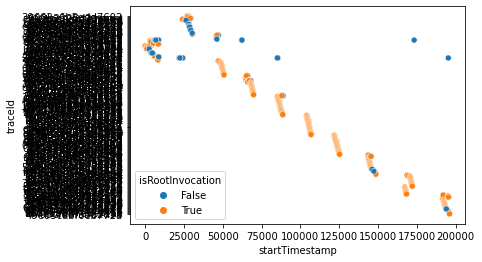

In [100]:
sns.scatterplot(data=df, x="startTimestamp", y="traceId", hue=df["isRootInvocation"])

<AxesSubplot:xlabel='startTimestamp', ylabel='billedDuration'>

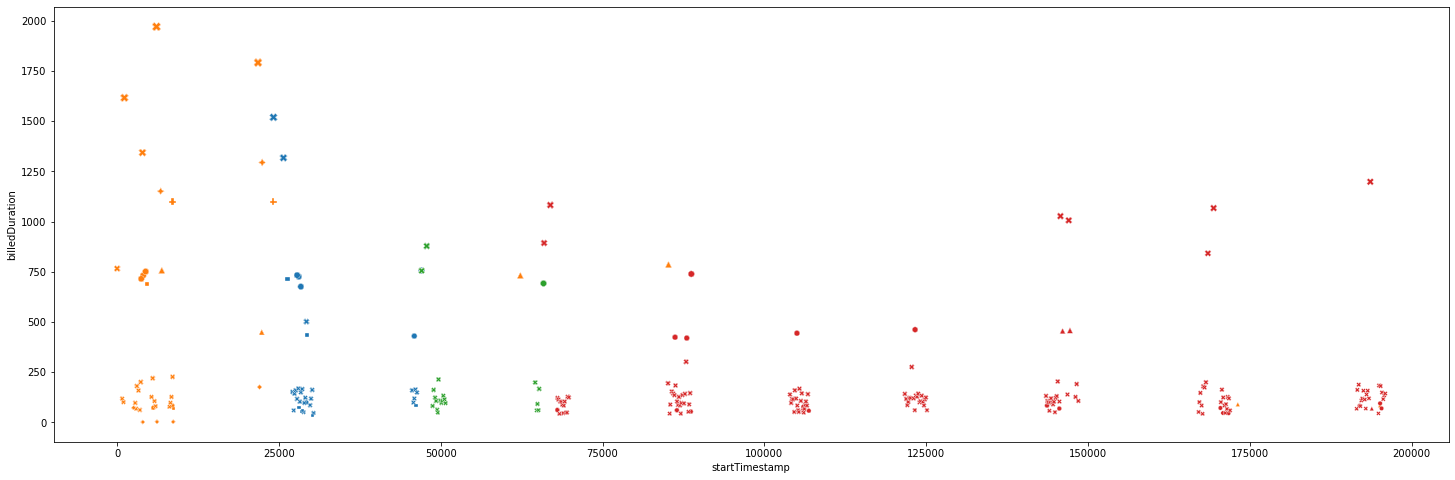

In [101]:
plt.figure(figsize=(25,8))
sns.scatterplot(data=df, x="startTimestamp", y="billedDuration", size="billedDuration", hue=df["fusionGroup"], style="currentFunction", legend=None)

<AxesSubplot:xlabel='startTimestamp', ylabel='billedDuration'>

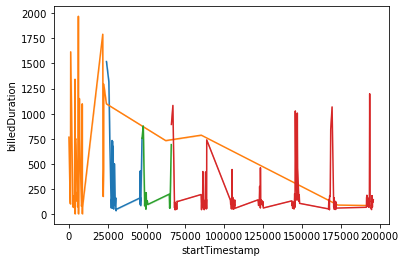

In [102]:
df['10s_billedDuration_avg'] = df['billedDuration'].rolling(10000000).mean()
sns.lineplot(data=df, x="startTimestamp", y="billedDuration", hue=df["fusionGroup"], legend=None)